# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3')

C:\Users\kk17409\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import mplleaflet
import pandas as pd
%matplotlib notebook
#%matplotlib inline
##### Read the data
df = pd.read_csv('21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3.csv').iloc[:, 1:]
#Change 'Date' from string to datetime
df['Date']=pd.to_datetime(df['Date'])
#type(df['Date'].iloc[1])

####Remove leap days
leap_idx=df['Date'][(pd.DatetimeIndex(df['Date']).day==29) & (pd.DatetimeIndex(df['Date']).month==2)].index
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day
df['Year']=pd.DatetimeIndex(df['Date']).year
#df['Month-Day']=df['Date'].dt.strftime('%m-%d')
df.drop(index=leap_idx,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
#####Make temp into celcius
df['Temp']=df['Data_Value']/10

In [8]:
### Get the max and min values in seperate dfs
df_max=df[df['Element']=='TMAX']
df_min=df[df['Element']=='TMIN']
df_max_2014=df_max[(df_max['Date'] >= '2005') & (df_max['Date'] < '2015')]
df_min_2014=df_min[(df_min['Date'] >= '2005') & (df_min['Date'] < '2015')]
df_max_2015=df_max[(df_max['Year']==2015)]
df_min_2015=df_min[(df_min['Year']==2015)]

In [9]:
#max and min for 2005-2014
df_max_2014_per_date=df_max_2014.groupby(['Month','Day']).max()
df_min_2014_per_date=df_min_2014.groupby(['Month','Day']).min()
#max and min for 2015
df_max_2015_per_date=df_max_2015.groupby(['Month','Day']).max()
df_min_2015_per_date=df_min_2015.groupby(['Month','Day']).min()

In [10]:
###create series of 2015 record breaking values
df_min_2015_per_date['record']=df_min_2015_per_date['Temp'][(df_min_2015_per_date['Temp']-df_min_2014_per_date['Temp'])<0]
df_max_2015_per_date['record']=df_max_2015_per_date['Temp'][(df_max_2015_per_date['Temp']-df_max_2014_per_date['Temp'])>0]

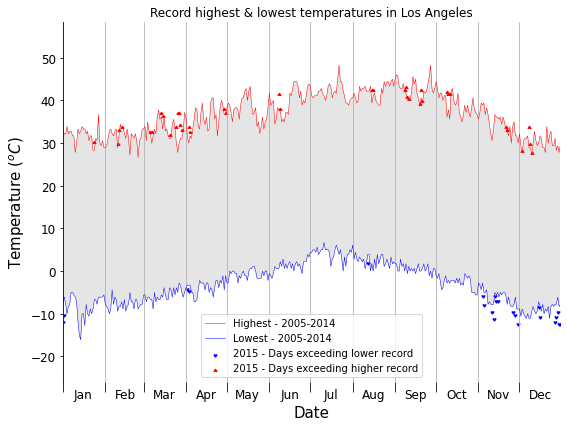

In [29]:
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import datetime
from dateutil.relativedelta import relativedelta
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
#plt.plot(df_min_2014_per_date['Date'].dt.strftime('%m-%d'),df_min_2014_per_date['Temp'],label='Record Minimum Values')
#plt.plot(df_max_2014_per_date['Date'].dt.strftime('%m-%d'),df_max_2014_per_date['Temp'],label='Record Maximum Values')
### fixing x axis ticks

###locator of ticks : major ticks will rmain visible at start of month 
##################### minor ticks will be hidden and located at mid month, labels will appear undeneath them
major_locator=mdates.MonthLocator()
minor_locator=mdates.MonthLocator(bymonthday=16)

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)

#### format of tick labels: major ticks will have an empty string 
##########################  minor ticks will have the month string as a label and be positioned mid-distance in months
major_formatter=mpl.ticker.NullFormatter()
minor_formatter=mdates.DateFormatter("%b")

ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_minor_formatter(minor_formatter)



###ploting
ax.plot(df_max_2014_per_date['Date'],df_max_2014_per_date['Temp'],'r-',linewidth=0.5,label='Highest - 2005-2014')
ax.plot(df_max_2014_per_date['Date'],df_min_2014_per_date['Temp'],'b-',linewidth=0.5,label='Lowest - 2005-2014')
ax.scatter(df_max_2014_per_date['Date'],df_min_2015_per_date['record'],marker=11, c='b',s=10, label='2015 - Days exceeding lower record')
ax.scatter(df_max_2014_per_date['Date'],df_max_2015_per_date['record'],marker=6, c='r',s=10, label='2015 - Days exceeding higher record')


###title labels and layout
plt.title(label="Record highest & lowest temperatures in Los Angeles")
plt.ylabel("Temperature ($^{o}C$)",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.tight_layout()



ax.axis([df_max_2014_per_date['Date'][0],df_max_2014_per_date['Date'][-1],
       df_min_2014_per_date['Temp'].min()-10,df_max_2014_per_date['Temp'].max()+10])



### make mid month ticks invisible
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

    
### hide first and last labels of the minor ticks      
#ax.xaxis.get_minor_ticks()[0].label1.set_visible(False)
#ax.xaxis.get_minor_ticks()[-1].label1.set_visible(False)

###change tick length and label font to make pretty
ax.tick_params(axis='x',which='minor',labelsize='large')
ax.tick_params(axis='x',which='major', length=10)
ax.tick_params(axis='y',which='major',labelsize='large')

### add gridlines on x
plt.grid(which='major',axis='x')

###remove top right and bottom spine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


###fill between min and max temps
plt.gca().fill_between(df_max_2014_per_date['Date'], 
                       df_max_2014_per_date['Temp'], df_min_2014_per_date['Temp'], 
                       facecolor='gray', 
                       alpha=0.2)


###legend 
plt.legend(loc=8)

plt.savefig('CW2_graph.jpg', dpi=1200,quality=95)